# Fonte dos dados: 
Dados do Estado do Rio de Janeiro:
<http://sistemas.saude.rj.gov.br/tabnetbd/dhx.exe?covid19/esus_sivep.def>

Base de Datos COVID-19 (Brasil): https://covid.saude.gov.br/ e  https://brasil.io/dataset/covid19/caso_full/

IDH de cidades ao redor do mundo:
<https://globaldatalab.org/shdi/shdi/?levels=1%2B4&interpolation=1&extrapolation=0&nearest_real=0> 

COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University: <https://github.com/CSSEGISandData/COVID-19>

Base de Datos COVID-19 (Chile): https://www.minciencia.gob.cl/covid19/ e https://github.com/MinCiencia/Datos-COVID19

Base de Datos COVID-19 (USA): https://usafacts.org/visualizations/coronavirus-covid-19-spread-map

Casos confirmados em Buenos Aires - Argentina: <https://data.buenosaires.gob.ar/dataset/casos-covid-19>

Casos confirmados em Tokyo - Japão: <https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000068> e <https://covid19.mhlw.go.jp/en/>

França: https://data.education.gouv.fr/explore/dataset/fr-en-situation_nationale_covid/export/?sort=date e https://www.data.gouv.fr/fr/datasets/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/

Espanha: <https://datos.comunidad.madrid/catalogo/dataset/covid19_tia_muni_y_distritos>

Riad Arabia Saudita: https://datasource.kapsarc.org/pages/home/


In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

pacote_coef_s = []
pacote_coef_d = []

def grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear):
    
    meio = int((oeste+leste)/2)
    um_quarto = int((oeste+meio)/2)
    tres_quartos = int((meio+leste)/2)

    dados0_y_rio = dados0[nome_cidade][oeste:leste].to_numpy()/população
    dados_x = dados0.index[oeste:leste].to_numpy()

    if dados_limpos == True:
        dados1_y = dados1[nome_cidade][oeste:leste].to_numpy()/população
        dados1_x = dados1.index[oeste:leste].to_numpy()

    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(dados_x, dados0_y_rio, alpha=1, label='Dados limpos')
    
    if dados_limpos == True:
        ax.plot(dados1_x, dados1_y,'*-r', alpha=0.3, label='Dados coletados')
        
    ax.grid(True)
    ax.set_ylabel('Densidade populacional')
    ax.set_xlabel('Dias')
    ax.legend(frameon=False)
    #fig.autofmt_xdate(rotation=45)
    label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
              dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
    ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)

    if escala_log_linear == True:
        plt.yscale('log')
    
    plt.title(f'Casos confirmados: {nome_cidade}; {população} habitantes.')
    
    return

def fit(dados0, oeste, leste, população, nome_cidade, pre_pico):
    
    meio = int((oeste+leste)/2)
    um_quarto = int((oeste+meio)/2)
    tres_quartos = int((meio+leste)/2)

    dados0_y_log = np.log(dados0[nome_cidade][oeste:leste].to_numpy()/população)
    dados_x = dados0.index[oeste:leste].to_numpy()

    idx = np.isfinite(dados_x) & np.isfinite(dados0_y_log)
    coef1 = np.polynomial.polynomial.Polynomial.fit(dados_x[idx], dados0_y_log[idx], 1)
    coef_l, coef_a = coef1.convert().coef

    fig, ax = plt.subplots(figsize=(15,8))

    ax.scatter(dados_x, dados0_y_log, label='Dados reais')
    ax.plot(dados_x, coef_l + coef_a*dados_x, 'r',label='Curva de ajuste')

    ax.text(0.3, 0.9, f'Reta: y = {round(coef_l,9)} + {round(coef_a,9)}*x', fontsize=13,style='italic', transform=ax.transAxes)

    ax.grid(True)
    ax.set_ylabel('Logaritmo natural da densidade populacional')
    ax.set_xlabel('Dias')
    ax.legend(frameon=False)

    label = [dados0.loc[oeste]['Datas'],dados0.loc[um_quarto]['Datas'],dados0.loc[meio]['Datas'],
              dados0.loc[tres_quartos]['Datas'],dados0.loc[leste]['Datas']]
    ax.set_xticks([oeste,um_quarto,meio,tres_quartos,leste], labels=label)
    
    if pre_pico == True:
        frase = 'Ajuste linear antes do pico'
        pacote_coef_s.append([nome_cidade,coef_a])

    else:
        frase = 'Ajuste linear após o pico'
        pacote_coef_d.append([coef_a])

    plt.title(f'{frase}; {nome_cidade}; {população} habitantes.')
        
    return coef_a

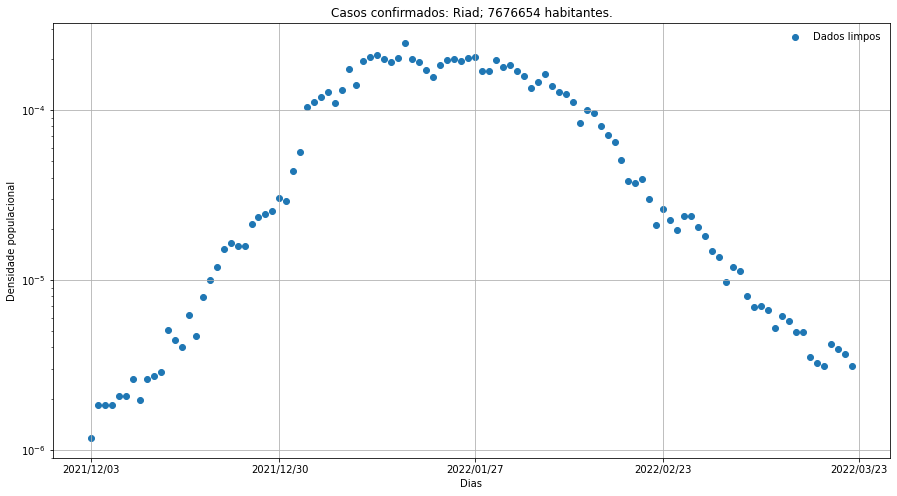

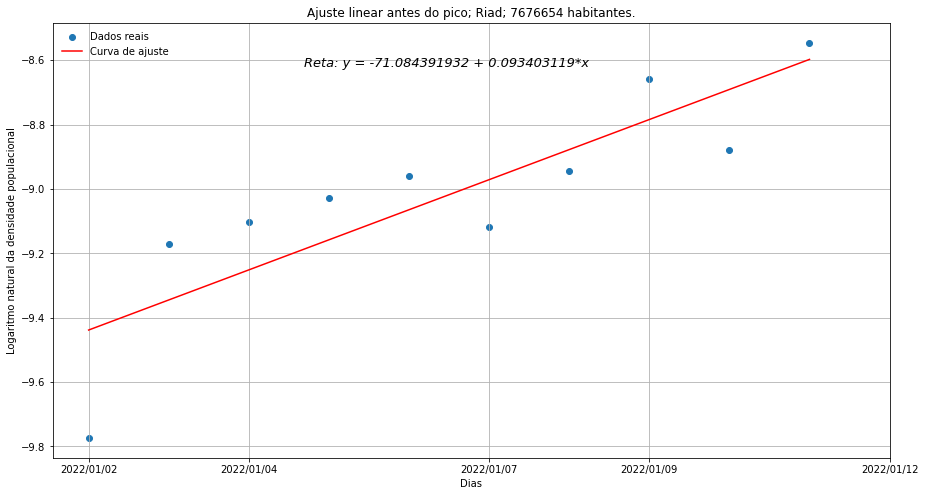

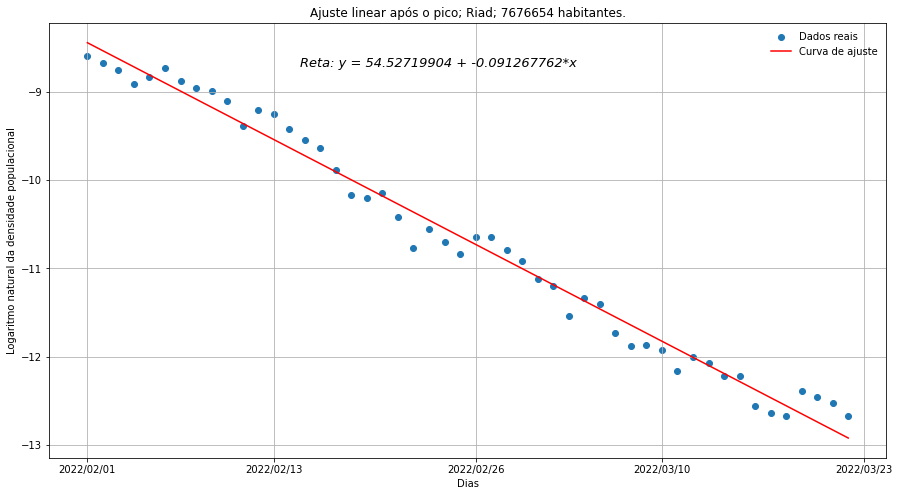

In [2]:
# Riad - Arábia Saudita

# Entrada
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Riad_casos.csv')
dados_limpos = False
dados1 = 0

# Região
população = 7676654
nome_cidade = 'Riad'

# Intervalos
oeste = 630
leste = 740

# Log-linear
escala_log_linear = True

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 660
leste = 670
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)

# Descida
oeste = 690
leste = 740
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)


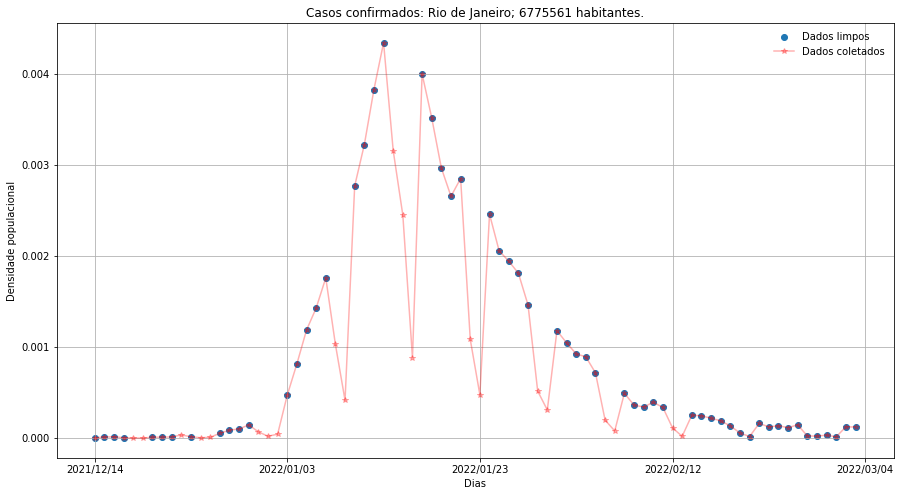

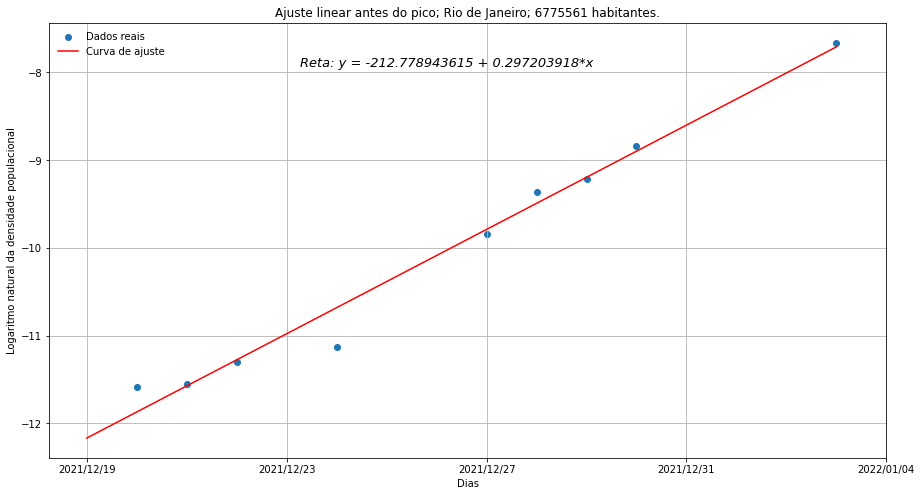

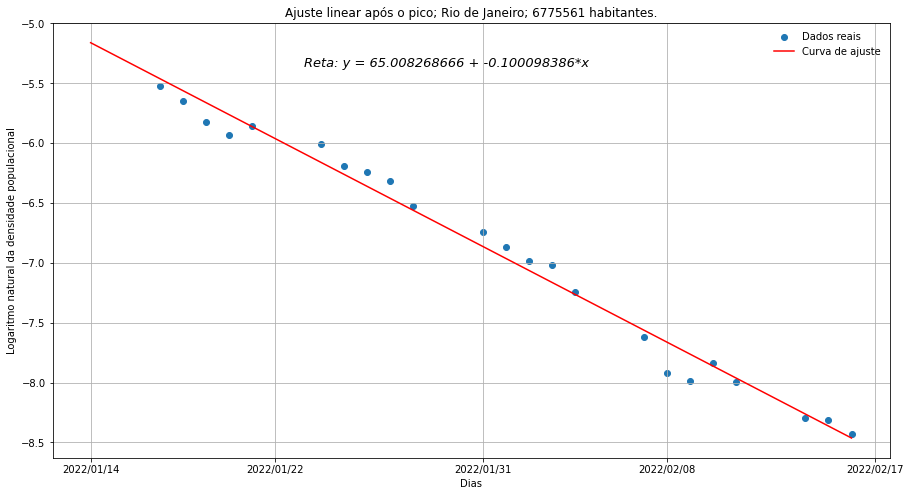

In [11]:
# Rio de Janeiro - Estado do Rio de Janeiro

# Dados
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Rio_de_Janeiro_cidade.csv')
dados_limpos = True
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Rio_de_Janeiro_cidade_limpos.csv')

# Região
população = 6775561
nome_cidade = 'Rio de Janeiro'

# Intervalos
oeste = 670
leste = 750

# Log-linear
escala_log_linear = False

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 675
leste = 691
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)

# Descida
oeste = 701
leste = 735
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)


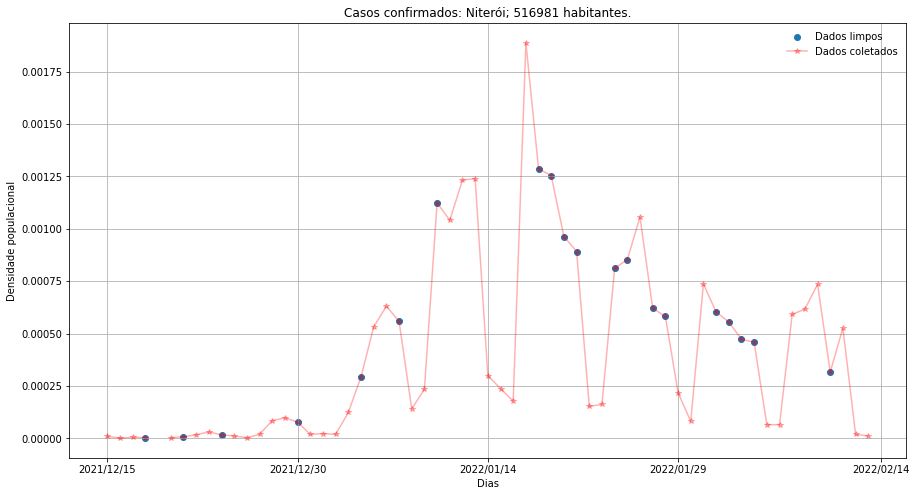

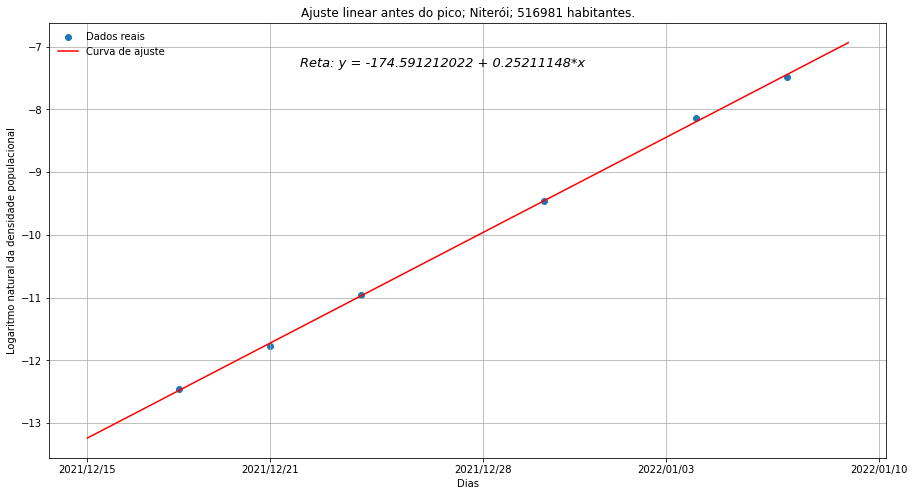

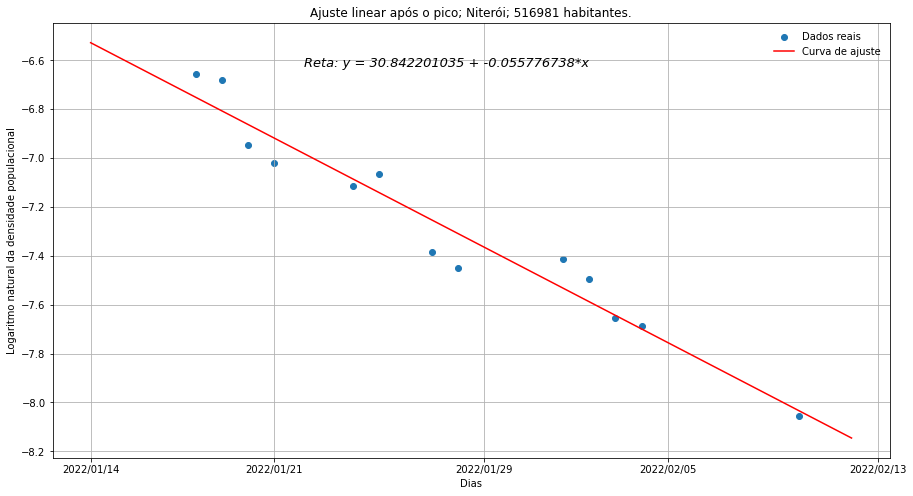

In [3]:
# Niterói - Estado do Rio de Janeiro

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Niterói_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Niterói_casos.csv')

# Região
população = 516981
nome_cidade = 'Niterói'

# Intervalos
oeste = 640
leste = 701

# Log-linear
escala_log_linear = False

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 640
leste = 666
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 
# Descida
oeste = 670
leste = 700
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)


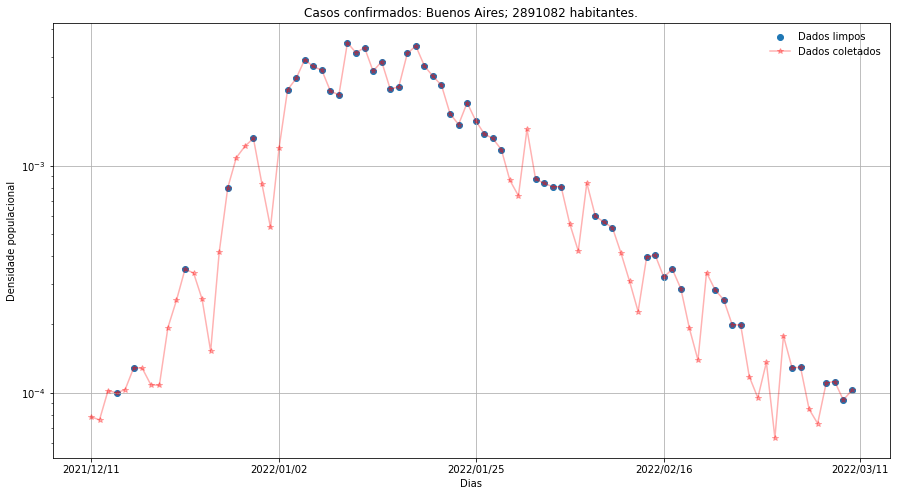

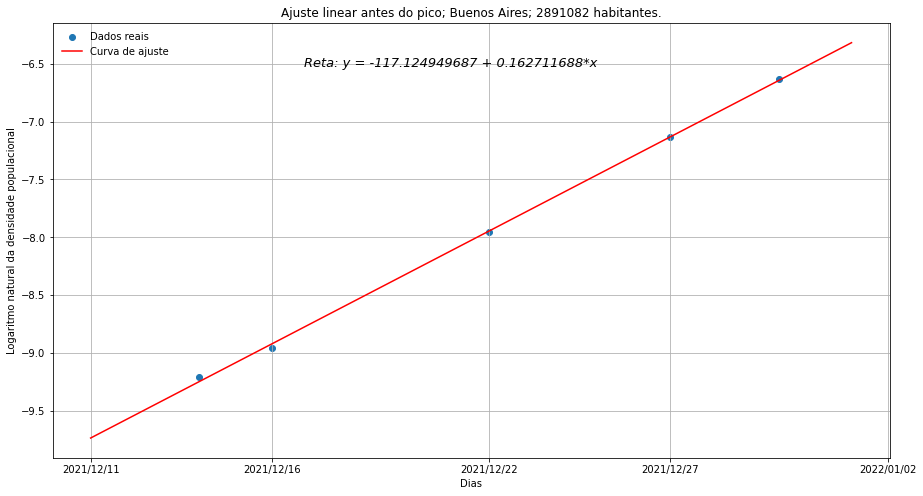

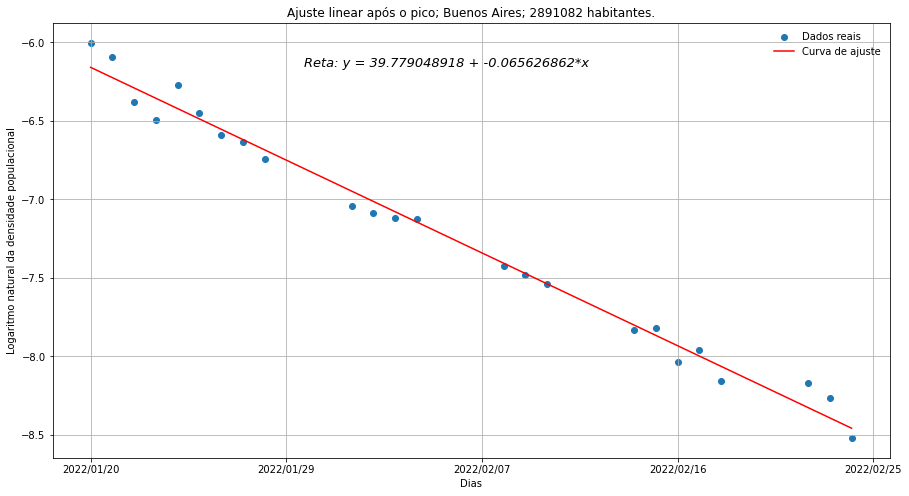

In [4]:
# Buenos Aires - Argentina

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Buenos_Aires_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Buenos_Aires_casos.csv')

# Região
população = 2891082
nome_cidade = 'Buenos Aires'

# Intervalos
oeste = 660
leste = 750

# Log-linear
escala_log_linear = True

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 660
leste = 682
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 
# Descida
oeste = 700
leste = 736
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 

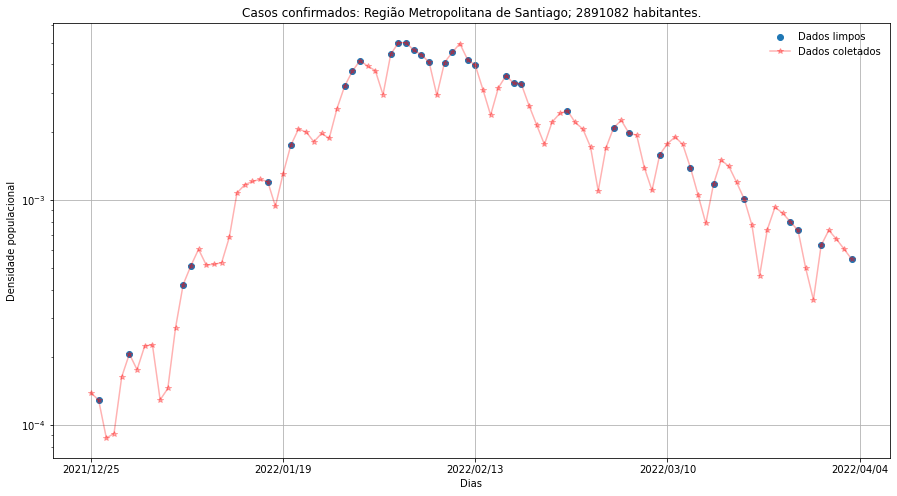

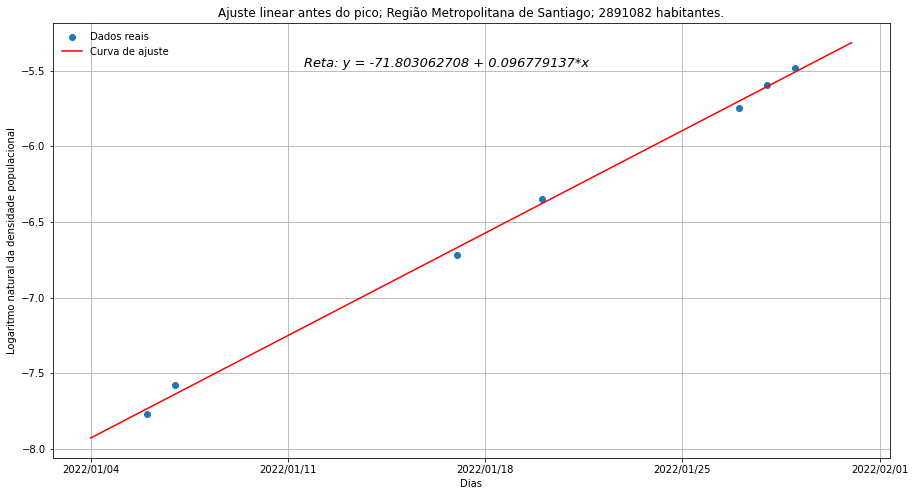

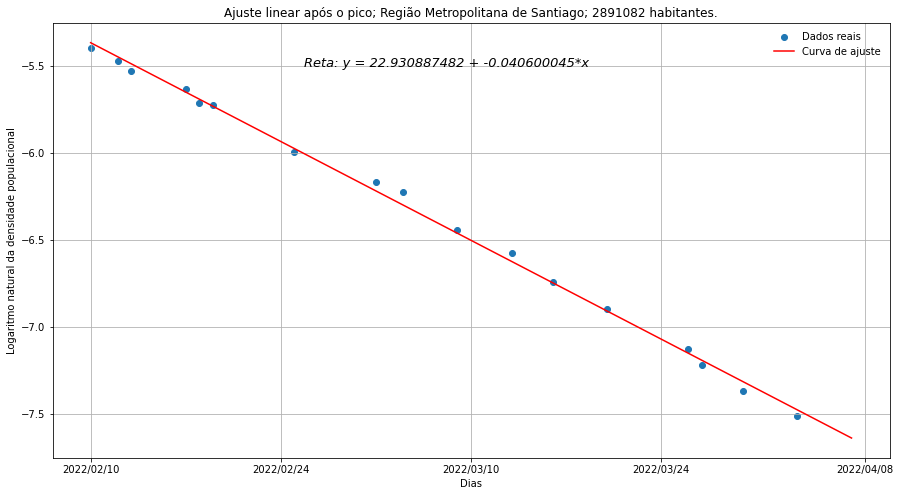

In [6]:
# Região Metropolitana de Santiago - Chile

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Região_Metropolitana_de_Santiago_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Região_Metropolitana_de_Santiago_casos.csv')

# Região
população = 2891082
nome_cidade = 'Região Metropolitana de Santiago'

# Intervalos
oeste = 650
leste = 750

# Log-linear
escala_log_linear = True

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 660
leste = 688
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 

# Descida
oeste = 697
leste = 754
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 


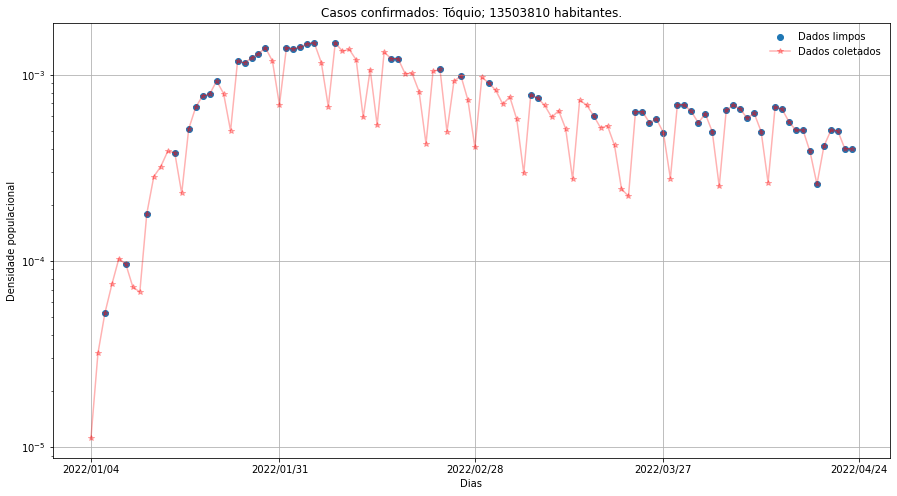

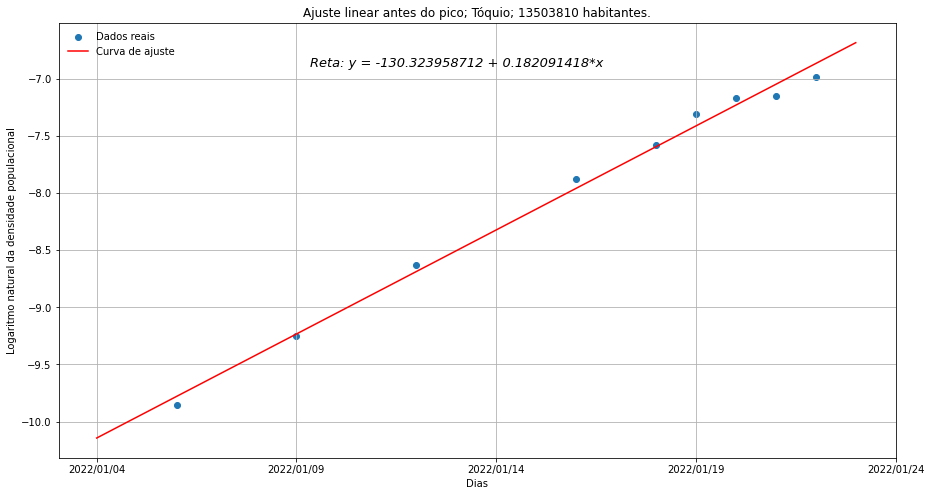

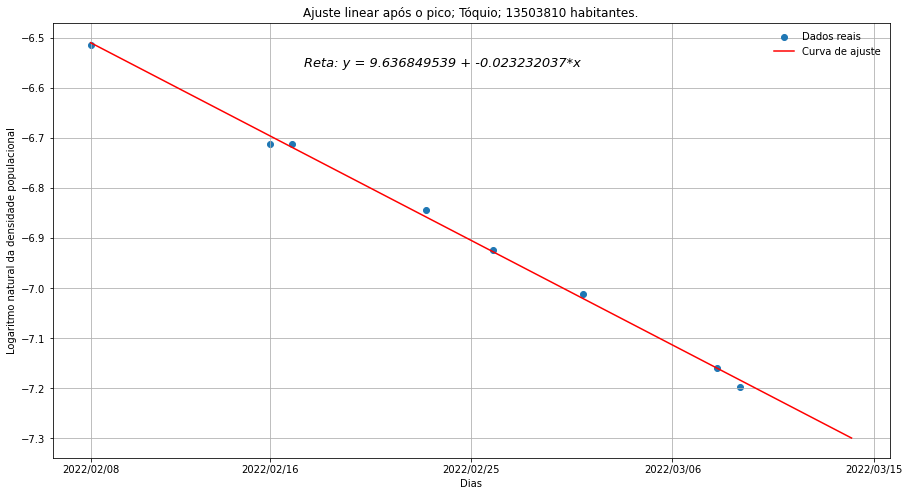

In [5]:
# Tokyo distrito - Japão

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Tóquio_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Tóquio_casos.csv')

# Região
população = 13503810
nome_cidade = 'Tóquio'

# Intervalos
oeste = 660
leste = 770

# Log-linear
escala_log_linear = True

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 660
leste = 680
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 

# Descida
oeste = 695
leste = 730
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 


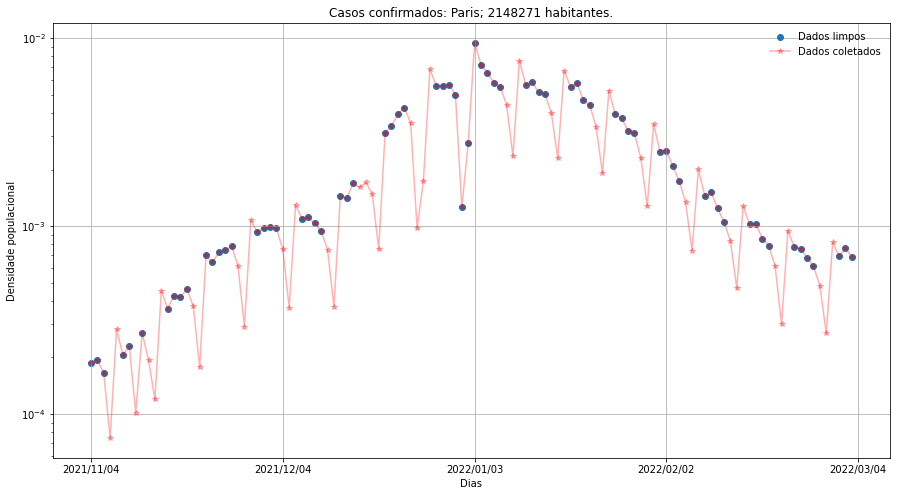

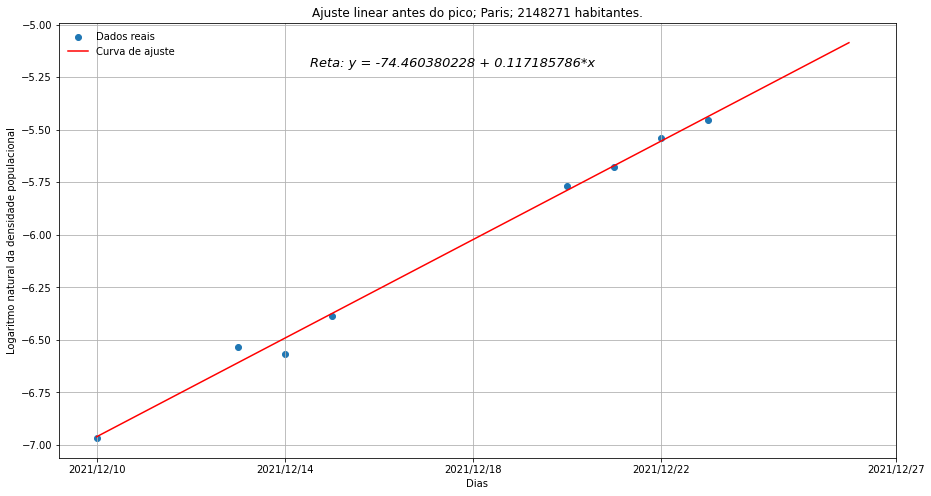

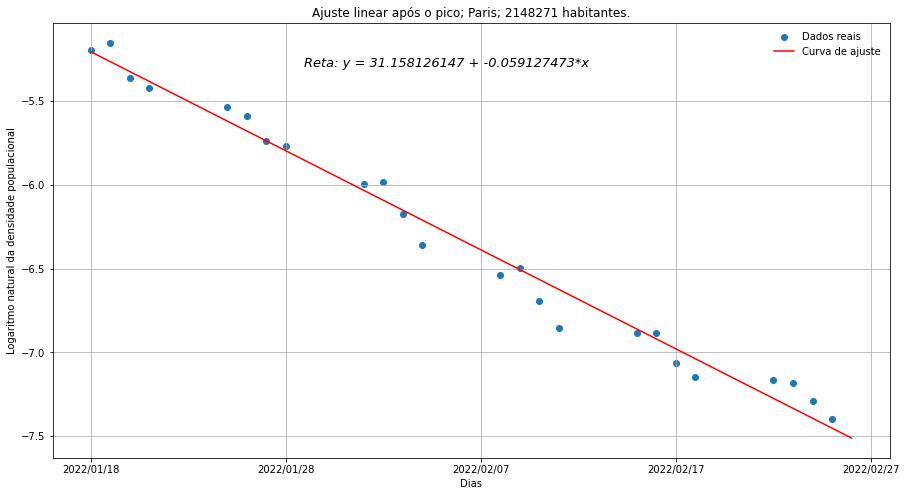

In [16]:
# Paris - France

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Paris_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Paris_casos.csv')

# Região
população = 2148271
nome_cidade = 'Paris'

# Intervalos
oeste = 540
leste = 660


# Log-linear
escala_log_linear = True

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 576
leste = 593
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 

# Descida
oeste = 615
leste = 655
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 


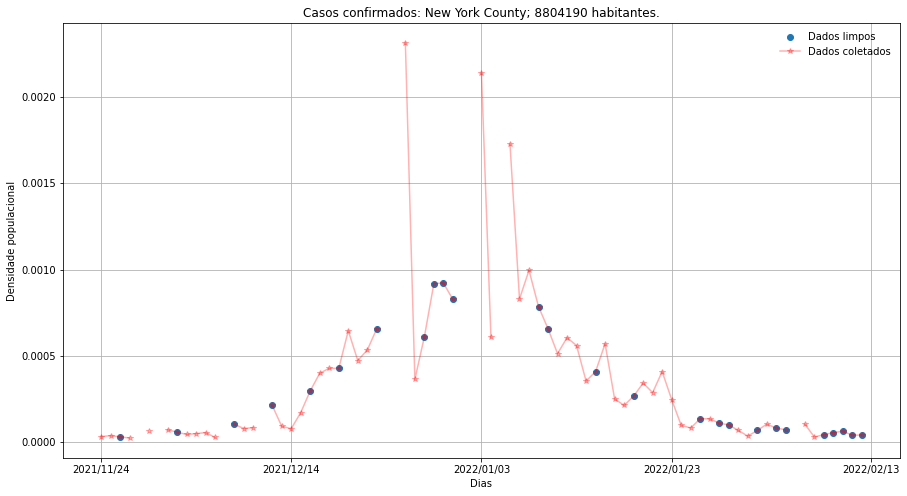

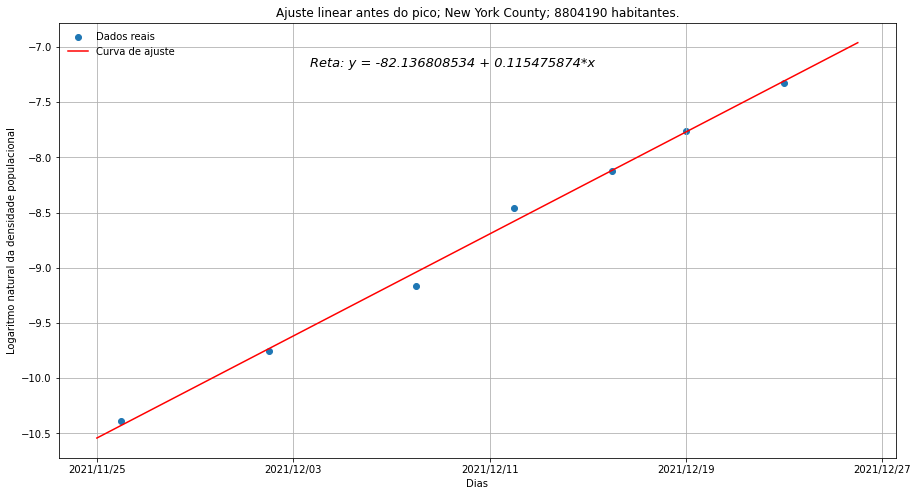

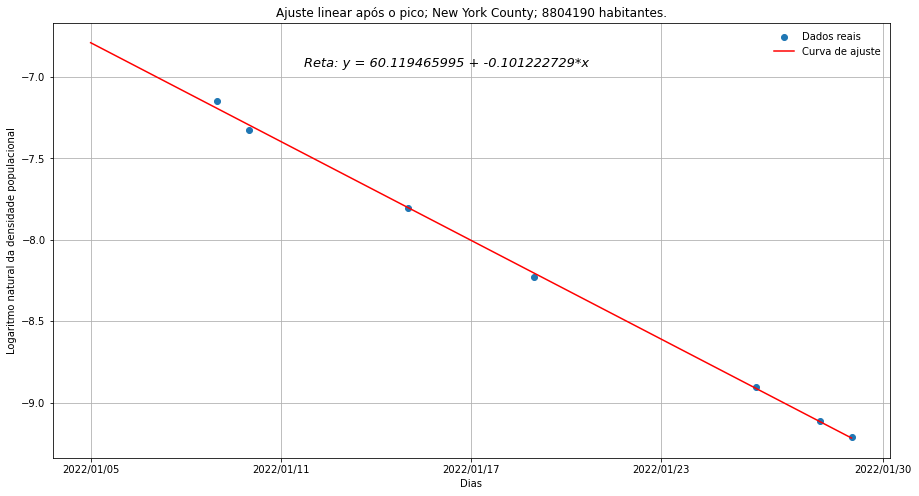

In [9]:
# New York County- USA

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/New_York_County_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/New_York_County_casos.csv')

# Região
população = 8804190
nome_cidade = 'New York County'

# Intervalos
oeste = 619
leste = 700


# Log-linear
escala_log_linear = False

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 620
leste = 652
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 

# Descida
oeste = 661
leste = 686
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 


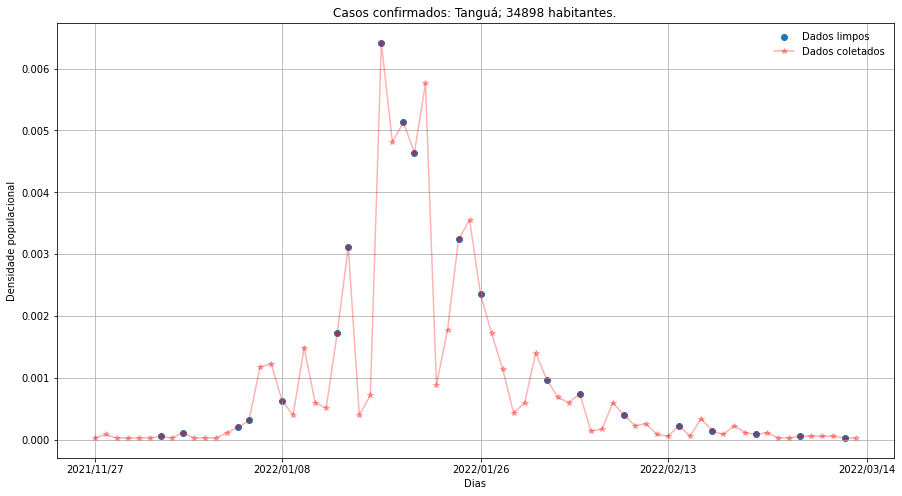

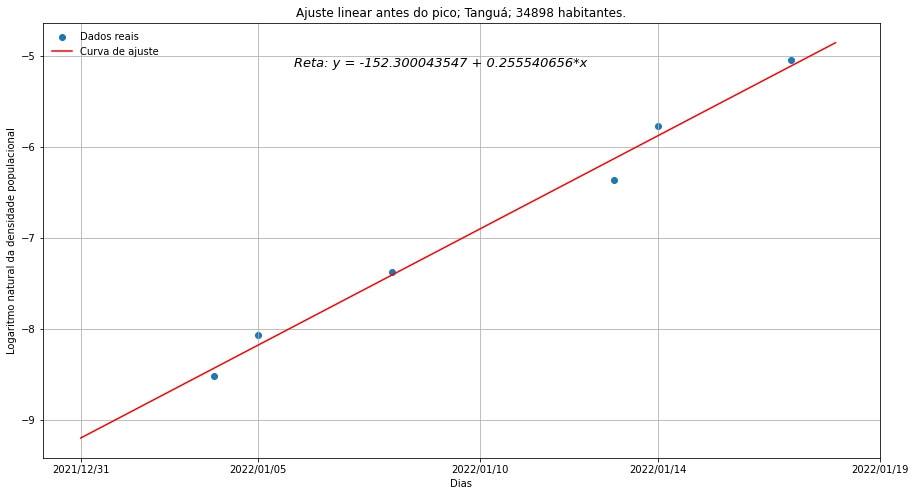

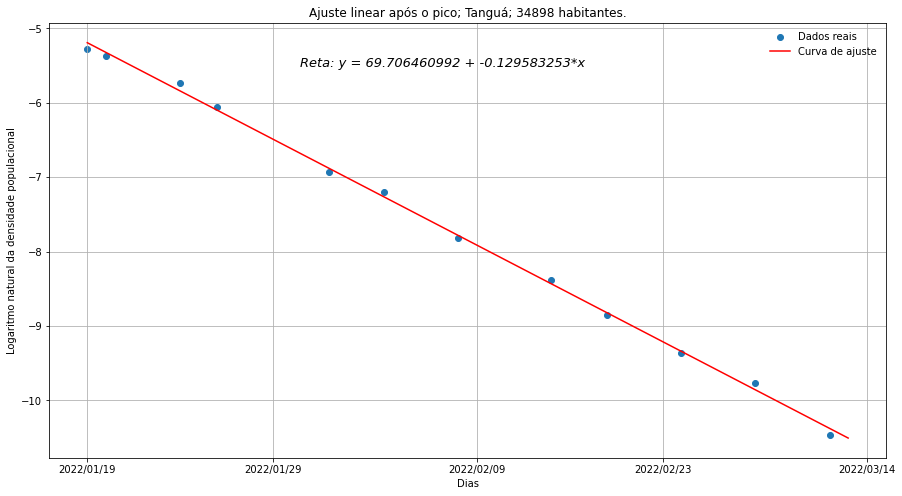

In [10]:
# Tanguá - Estado do Rio de Janeiro

# Dados
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv_dados_limpos/Tanguá_casos_limpos.csv')
dados_limpos = True
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Tanguá_casos.csv')

# Região
população = 34898
nome_cidade = 'Tanguá'

# Intervalos
oeste = 550
leste = 620


# Log-linear
escala_log_linear = False

# Plot
grafico(dados0, dados_limpos, dados1, oeste, leste, população, nome_cidade, escala_log_linear)

# Subida
oeste = 560
leste = 578
pre_pico = True
coef_s = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 

# Descida
oeste = 578
leste = 620
pre_pico = False
coef_d = fit(dados0, oeste, leste, população, nome_cidade, pre_pico)
 


# 

In [11]:
a = pd.DataFrame(pacote_coef_s).rename(columns={0: 'Cidades',1:'Coef_s'})
b = pd.DataFrame(pacote_coef_d).rename(columns={0:'Coef_d'})
c = pd.concat([a,b], axis=1)
d = c.set_index('Cidades')
d

,Coef_s,Coef_d
Cidades,,
Riad,0.134097,-0.091268
Rio de Janeiro,0.161522,-0.100098
Niterói,0.252111,-0.055777
Buenos Aires,0.162712,-0.065627
Região Metropolitana de Santiago,0.096779,-0.040600
Tóquio,0.182091,-0.023232
Paris,0.080908,-0.059127
New York County,0.115476,-0.101223
Tanguá,0.255541,-0.129583


In [12]:
d.to_csv('/home/isplay/projeto_propagacao_epidemias/Coef.csv')